In [1]:
!python -V

Python 3.9.12


In [ ]:
#!pip install fastparquet

In [52]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

In [75]:
def preprocess(data_dir):
    df = pd.read_parquet(data_dir, engine='fastparquet')
    
    df['duration'] = df['dropOff_datetime']-df['pickup_datetime']
    df['duration'] = df['duration'].apply(lambda x: x.total_seconds()/60)
    df = df[(df['duration'] >= 1.0) & (df['duration'] <= 60.0)]
    
    categorical=["PUlocationID","DOlocationID"]
    for header in categorical:
        df[header].fillna(-1, inplace=True)
        
    df[categorical] = df[categorical].astype(str)
    return df

In [76]:
def prepare_train_eval_data(train_df, eval_df, dv):
    categorical=["PUlocationID","DOlocationID"]
    train_dicts = train_df[categorical].to_dict(orient='records')
    val_dicts = eval_df[categorical].to_dict(orient='records')
    
    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)
    
    target = 'duration'
    y_train = train_df['duration'].values
    y_val = feb_df['duration'].values
    
    return X_train, y_train, X_val, y_val

In [77]:
train_df=preprocess('data/fhv_tripdata_2021-01.parquet')
eval_df=preprocess('data/fhv_tripdata_2021-02.parquet')

dv = DictVectorizer()
X_train, y_train, X_val, y_val=prepare_train_eval_data(train_df, eval_df, dv)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = lr.predict(X_train)
print("RMSE on train: {}".format(mean_squared_error(y_train, y_pred, squared=False)))
y_pred_val = lr.predict(X_val)
print("RMSE on validation: {}".format(mean_squared_error(y_val, y_pred_val, squared=False)))

RMSE on train: 10.528519107206316
RMSE on validation: 11.014283149347039


In [80]:
with open("models/lin_reg.bin","wb") as f_out:
    pickle.dump((dv,lr), f_out)

## QUESTION 1: Number of records in January 2021: 1154112

## QUESTION 2: Average trip duration in January 2021: 16.24 minutes

## DATA PREPARATION QUESTION: 96.16 % of the records are between 1 and 60 minutes (inclusive), and 44286 records will be dropped when the trips are only between 1 and 60 minutes (inclusive)

## QUESTION 3: 83.527 % of the values for the pickup location ID in January 2021 were missing (NaN)

## QUESTION 4: The dimensionality of the feature matrix is 525 (The number of columns).

## QUESTION 5: RMSE on train: 10.5285

## QUESTION 6: RMSE on validation: 11.0142

### Code with all the analysis (histogram and dtypes visualization, describe() with percentiles etc)

In [3]:
jan_df = pd.read_parquet('data/fhv_tripdata_2021-01.parquet', engine='fastparquet')

In [4]:
feb_df = pd.read_parquet('data/fhv_tripdata_2021-02.parquet', engine='fastparquet')

In [5]:
n_records = len(jan_df)
print("Number of records in January 2021: {}".format(n_records))

Number of records in January 2021: 1154112


In [6]:
jan_df.dtypes, 

(dispatching_base_num              object
 pickup_datetime           datetime64[ns]
 dropOff_datetime          datetime64[ns]
 PUlocationID                     float64
 DOlocationID                     float64
 SR_Flag                          float64
 Affiliated_base_number            object
 dtype: object,)

In [7]:
feb_df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                          float64
Affiliated_base_number            object
dtype: object

In [8]:
jan_df['duration'] = jan_df['dropOff_datetime']-jan_df['pickup_datetime']

In [9]:
feb_df['duration'] = feb_df['dropOff_datetime']-feb_df['pickup_datetime']

In [10]:
jan_df['duration']

0         0 days 00:17:00
1         0 days 00:17:00
2         0 days 01:50:00
3         0 days 00:08:17
4         0 days 00:15:13
                ...      
1154107   0 days 00:08:45
1154108   0 days 00:57:36
1154109   0 days 00:16:12
1154110   0 days 00:19:26
1154111   0 days 00:36:00
Name: duration, Length: 1154112, dtype: timedelta64[ns]

In [11]:
feb_df['duration']

0         0 days 01:32:00
1         0 days 00:10:40
2         0 days 00:14:34
3         0 days 00:07:57
4         0 days 00:13:48
                ...      
1037687   0 days 00:13:32
1037688   0 days 00:11:28
1037689   0 days 00:25:23
1037690   0 days 00:18:03
1037691   0 days 00:16:00
Name: duration, Length: 1037692, dtype: timedelta64[ns]

In [12]:
jan_df['duration'] = jan_df['duration'].apply(lambda x: x.total_seconds()/60)

In [13]:
feb_df['duration'] = feb_df['duration'].apply(lambda x: x.total_seconds()/60)

In [14]:
jan_df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,NaN,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,NaN,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,NaN,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,NaN,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,NaN,B00037,15.216667
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,NaN,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,NaN,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,NaN,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,NaN,B03285,19.433333


In [15]:
feb_df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,NaN,B00014,92.000000
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,NaN,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,NaN,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,NaN,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,NaN,B00037,13.800000
...,...,...,...,...,...,...,...,...
1037687,B03282,2021-02-28 23:01:16,2021-02-28 23:14:48,NaN,31.0,NaN,B01717,13.533333
1037688,B03282,2021-02-28 23:36:10,2021-02-28 23:47:38,NaN,169.0,NaN,B01717,11.466667
1037689,B03285,2021-02-28 23:18:36,2021-02-28 23:43:59,28.0,171.0,NaN,B03285,25.383333
1037690,B03285,2021-02-28 23:26:34,2021-02-28 23:44:37,16.0,252.0,NaN,B03285,18.050000


In [81]:
print("Average trip duration in January 2021: {} minutes".format(jan_df['duration'].mean()))

Average trip duration in January 2021: 16.247253368247375 minutes


/home/Krishnan/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

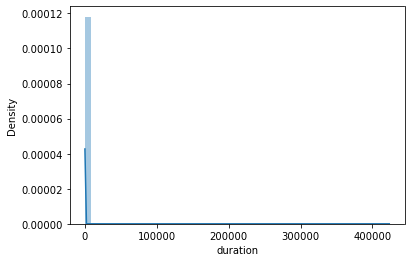

In [18]:
sns.distplot(jan_df['duration'])

/home/Krishnan/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

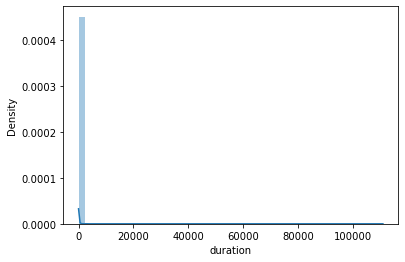

In [19]:
sns.distplot(feb_df['duration'])

In [20]:
jan_df['duration'].describe(percentiles=[0.90,0.95,0.97,0.98,0.99])

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
50%      1.340000e+01
90%      3.563333e+01
95%      4.725000e+01
97%      5.775000e+01
98%      6.613333e+01
99%      9.030000e+01
max      4.233710e+05
Name: duration, dtype: float64

In [21]:
feb_df['duration'].describe(percentiles=[0.90,0.95,0.97,0.98,0.99])

count    1.037692e+06
mean     2.070699e+01
std      1.611084e+02
min      1.666667e-02
50%      1.410000e+01
90%      3.870000e+01
95%      5.225000e+01
97%      6.366667e+01
98%      7.550300e+01
99%      1.050000e+02
max      1.109190e+05
Name: duration, dtype: float64

In [22]:
text = ["{} % of the records are between 1 and 60 minutes (inclusive)", 
        "{} records will be dropped when the trips are only between 1 and 60 minutes (inclusive)"]
hour_trips = ((jan_df['duration'] >= 1.0) & (jan_df['duration'] <= 60.0))
print(text[0].format(hour_trips.mean()*100))
print(text[1].format(n_records-hour_trips.sum()))

96.16276409915156 % of the records are between 1 and 60 minutes (inclusive)
44286 records will be dropped when the trips are only between 1 and 60 minutes (inclusive)


In [23]:
jan_df = jan_df[(jan_df['duration'] >= 1.0) & (jan_df['duration'] <= 60.0)]
jan_df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,NaN,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,NaN,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,NaN,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,NaN,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,NaN,B00037,9.050000
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,NaN,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,NaN,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,NaN,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,NaN,B03285,19.433333


In [24]:
feb_df = feb_df[(feb_df['duration'] >= 1.0) & (feb_df['duration'] <= 60.0)]
feb_df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,NaN,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,NaN,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,NaN,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,NaN,B00037,13.800000
5,B00037,2021-02-01 00:00:37,2021-02-01 00:09:35,NaN,61.0,NaN,B00037,8.966667
...,...,...,...,...,...,...,...,...
1037687,B03282,2021-02-28 23:01:16,2021-02-28 23:14:48,NaN,31.0,NaN,B01717,13.533333
1037688,B03282,2021-02-28 23:36:10,2021-02-28 23:47:38,NaN,169.0,NaN,B01717,11.466667
1037689,B03285,2021-02-28 23:18:36,2021-02-28 23:43:59,28.0,171.0,NaN,B03285,25.383333
1037690,B03285,2021-02-28 23:26:34,2021-02-28 23:44:37,16.0,252.0,NaN,B03285,18.050000


In [54]:
jan_df['PUlocationID'].fillna(-1, inplace=True)
jan_df['DOlocationID'].fillna(-1, inplace=True)
jan_df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,NaN,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,NaN,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,NaN,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1.0,61.0,NaN,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1.0,71.0,NaN,B00037,9.050000
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,NaN,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,NaN,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,NaN,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,NaN,B03285,19.433333


In [26]:
feb_df['PUlocationID'].fillna(-1, inplace=True)
feb_df['DOlocationID'].fillna(-1, inplace=True)
feb_df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,NaN,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,NaN,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,NaN,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,-1.0,225.0,NaN,B00037,13.800000
5,B00037,2021-02-01 00:00:37,2021-02-01 00:09:35,-1.0,61.0,NaN,B00037,8.966667
...,...,...,...,...,...,...,...,...
1037687,B03282,2021-02-28 23:01:16,2021-02-28 23:14:48,-1.0,31.0,NaN,B01717,13.533333
1037688,B03282,2021-02-28 23:36:10,2021-02-28 23:47:38,-1.0,169.0,NaN,B01717,11.466667
1037689,B03285,2021-02-28 23:18:36,2021-02-28 23:43:59,28.0,171.0,NaN,B03285,25.383333
1037690,B03285,2021-02-28 23:26:34,2021-02-28 23:44:37,16.0,252.0,NaN,B03285,18.050000


In [27]:
text="{} % of the values for the pickup location ID in January 2021 were missing (NaN)"
print(text.format((jan_df['PUlocationID']==-1).sum()/len(jan_df)*100))

83.52732770722618 % of the values for the pickup location ID in January 2021 were missing (NaN)


In [28]:
categorical=["PUlocationID","DOlocationID"]
jan_df[categorical] = jan_df[categorical].astype(str)

In [29]:
feb_df[categorical] = feb_df[categorical].astype(str)

In [30]:
train_dicts = jan_df[categorical].to_dict(orient='records')

In [31]:
val_dicts = feb_df[categorical].to_dict(orient='records')

In [40]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [41]:
X_val = dv.transform(val_dicts)

In [42]:
dv.feature_names_

['DOlocationID=-1.0',
 'DOlocationID=1.0',
 'DOlocationID=10.0',
 'DOlocationID=100.0',
 'DOlocationID=101.0',
 'DOlocationID=102.0',
 'DOlocationID=105.0',
 'DOlocationID=106.0',
 'DOlocationID=107.0',
 'DOlocationID=108.0',
 'DOlocationID=109.0',
 'DOlocationID=11.0',
 'DOlocationID=111.0',
 'DOlocationID=112.0',
 'DOlocationID=113.0',
 'DOlocationID=114.0',
 'DOlocationID=115.0',
 'DOlocationID=116.0',
 'DOlocationID=117.0',
 'DOlocationID=118.0',
 'DOlocationID=119.0',
 'DOlocationID=12.0',
 'DOlocationID=120.0',
 'DOlocationID=121.0',
 'DOlocationID=122.0',
 'DOlocationID=123.0',
 'DOlocationID=124.0',
 'DOlocationID=125.0',
 'DOlocationID=126.0',
 'DOlocationID=127.0',
 'DOlocationID=128.0',
 'DOlocationID=129.0',
 'DOlocationID=13.0',
 'DOlocationID=130.0',
 'DOlocationID=131.0',
 'DOlocationID=132.0',
 'DOlocationID=133.0',
 'DOlocationID=134.0',
 'DOlocationID=135.0',
 'DOlocationID=136.0',
 'DOlocationID=137.0',
 'DOlocationID=138.0',
 'DOlocationID=139.0',
 'DOlocationID=14.

In [43]:
X_train

<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

In [44]:
X_val

<990113x525 sparse matrix of type '<class 'numpy.float64'>'
	with 1980223 stored elements in Compressed Sparse Row format>

In [45]:
target = 'duration'
y_train = jan_df['duration'].values
y_train

array([17.        , 17.        ,  8.28333333, ..., 16.2       ,
       19.43333333, 36.        ])

In [46]:
y_val = feb_df['duration'].values
y_val

array([10.66666667, 14.56666667,  7.95      , ..., 25.38333333,
       18.05      , 16.        ])

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(X_train)

In [49]:
mean_squared_error(y_train, y_pred, squared=False)

10.528519107206316

In [50]:
y_pred_val = lr.predict(X_val)

In [51]:
mean_squared_error(y_val, y_pred_val, squared=False)

11.014283149347039